# Take a look at the dataset and how we preprocess it

In [2]:
import datasets
import librosa
import numpy as np
from constants import *
from visualization import *
import preprocessing
from librosa.display import waveplot
from IPython.display import Audio
import matplotlib.pyplot as plt

Take a random song.

In [3]:
dataset = datasets.GTZAN()

In [2]:
dataset = datasets.BALLROOM()

In [4]:
i = np.random.randint(dataset.nb_files)
print(dataset.filename(i))

blues.00055


Listen to the song with its beat track.

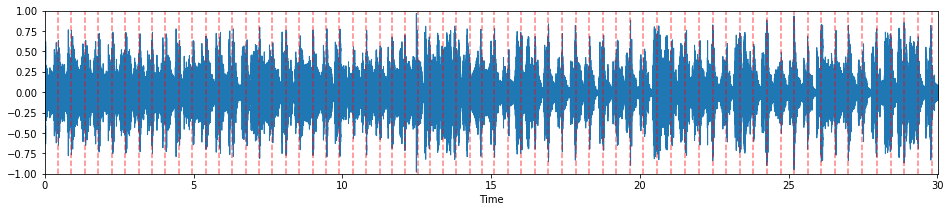

In [5]:
wav = librosa.load(dataset.wav_file(i), sr)[0]
beats = dataset.load_beats(dataset.annotation_file(i))
plt.figure(figsize=(16, 3))
librosa.display.waveplot(wav, sr)
plt.vlines(beats, -1, 1, color='r', alpha=0.5, linestyles='--')
plt.ylim(-1, 1);
clicks = librosa.clicks(times=beats, sr=sr, length=len(wav))
Audio(wav + clicks, rate=sr)

Show the spectrogram.

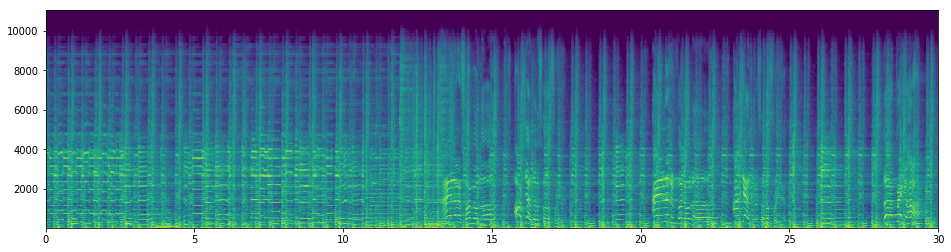

In [6]:
spec = preprocessing.get_spec(librosa.load(dataset.wav_file(i), sr)[0])
showspec(spec)

See the onsets and the one we select according to the beat track.

In [7]:
onsets, isbeat = preprocessing.get_onsets_from_beats(spec, beats)

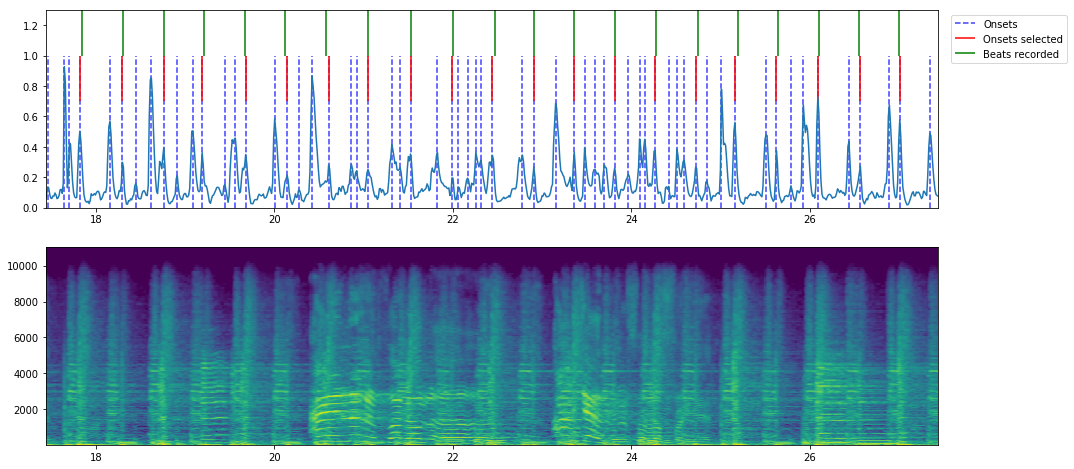

In [8]:
showdata(spec, onsets, isbeat, beats)

# Precompute all spectrograms and onsets data

In [9]:
dataset = datasets.GTZAN()

In [ ]:
dataset.precompute()

  0.03% | blues.00000.0
  0.07% | blues.00000.1
  0.10% | blues.00000.2
  0.13% | blues.00001.0
  0.17% | blues.00001.1
  0.20% | blues.00001.2
  0.23% | blues.00002.0
  0.27% | blues.00002.1
  0.30% | blues.00002.2
  0.33% | blues.00003.0
  0.37% | blues.00003.1
  0.40% | blues.00003.2
  0.43% | blues.00004.0
  0.47% | blues.00004.1
  0.50% | blues.00004.2
  0.53% | blues.00005.0
  0.57% | blues.00005.1
  0.60% | blues.00005.2
  0.63% | blues.00006.0
  0.67% | blues.00006.1
  0.70% | blues.00006.2
  0.73% | blues.00007.0
  0.77% | blues.00007.1
  0.80% | blues.00007.2
  0.83% | blues.00008.0
  0.87% | blues.00008.1
  0.90% | blues.00008.2
  0.93% | blues.00009.0
  0.97% | blues.00009.1
  1.00% | blues.00009.2
  1.03% | blues.00010.0
  1.07% | blues.00010.1
  1.10% | blues.00010.2
  1.13% | blues.00011.0
  1.17% | blues.00011.1
  1.20% | blues.00011.2
  1.23% | blues.00012.0
  1.27% | blues.00012.1
  1.30% | blues.00012.2
  1.33% | blues.00013.0
  1.37% | blues.00013.1
  1.40% | blues.

 11.23% | classical.00012.0
 11.27% | classical.00012.1
 11.30% | classical.00012.2
 11.33% | classical.00013.0
 11.37% | classical.00013.1
 11.40% | classical.00013.2
 11.43% | classical.00014.0
 11.47% | classical.00014.1
 11.50% | classical.00014.2
 11.53% | classical.00015.0
 11.57% | classical.00015.1
 11.60% | classical.00015.2
 11.63% | classical.00016.0
 11.67% | classical.00016.1
 11.70% | classical.00016.2
 11.73% | classical.00017.0
 11.77% | classical.00017.1
 11.80% | classical.00017.2
 11.83% | classical.00018.0
 11.87% | classical.00018.1
 11.90% | classical.00018.2
 11.93% | classical.00019.0
 11.97% | classical.00019.1
 12.00% | classical.00019.2
 12.03% | classical.00020.0
 12.07% | classical.00020.1
 12.10% | classical.00020.2
 12.13% | classical.00021.0
 12.17% | classical.00021.1
 12.20% | classical.00021.2
 12.23% | classical.00022.0
 12.27% | classical.00022.1
 12.30% | classical.00022.2
 12.33% | classical.00023.0
 12.37% | classical.00023.1
 12.40% | classical.

 21.07% | country.00010.1
 21.10% | country.00010.2
 21.13% | country.00011.0
 21.17% | country.00011.1
 21.20% | country.00011.2
 21.23% | country.00012.0
 21.27% | country.00012.1
 21.30% | country.00012.2
 21.33% | country.00013.0
 21.37% | country.00013.1
 21.40% | country.00013.2
 21.43% | country.00014.0
 21.47% | country.00014.1
 21.50% | country.00014.2
 21.53% | country.00015.0
 21.57% | country.00015.1
 21.60% | country.00015.2
 21.63% | country.00016.0
 21.67% | country.00016.1
 21.70% | country.00016.2
 21.73% | country.00017.0
 21.77% | country.00017.1
 21.80% | country.00017.2
 21.83% | country.00018.0
 21.87% | country.00018.1
 21.90% | country.00018.2
 21.93% | country.00019.0
 21.97% | country.00019.1
 22.00% | country.00019.2
 22.03% | country.00020.0
 22.07% | country.00020.1
 22.10% | country.00020.2
 22.13% | country.00021.0
 22.17% | country.00021.1
 22.20% | country.00021.2
 22.23% | country.00022.0
 22.27% | country.00022.1
 22.30% | country.00022.2
 22.33% | co

 31.70% | disco.00016.2
 31.73% | disco.00017.0
 31.77% | disco.00017.1
 31.80% | disco.00017.2
 31.83% | disco.00018.0
 31.87% | disco.00018.1
 31.90% | disco.00018.2
 31.93% | disco.00019.0
 31.97% | disco.00019.1
 32.00% | disco.00019.2
 32.03% | disco.00020.0
 32.07% | disco.00020.1
 32.10% | disco.00020.2
 32.13% | disco.00021.0
 32.17% | disco.00021.1
 32.20% | disco.00021.2
 32.23% | disco.00022.0
 32.27% | disco.00022.1
 32.30% | disco.00022.2
 32.33% | disco.00023.0
 32.37% | disco.00023.1
 32.40% | disco.00023.2
 32.43% | disco.00024.0
 32.47% | disco.00024.1
 32.50% | disco.00024.2
 32.53% | disco.00025.0
 32.57% | disco.00025.1
 32.60% | disco.00025.2
 32.63% | disco.00026.0
 32.67% | disco.00026.1
 32.70% | disco.00026.2
 32.73% | disco.00027.0
 32.77% | disco.00027.1
 32.80% | disco.00027.2
 32.83% | disco.00028.0
 32.87% | disco.00028.1
 32.90% | disco.00028.2
 32.93% | disco.00029.0
 32.97% | disco.00029.1
 33.00% | disco.00029.2
 33.03% | disco.00030.0
 33.07% | disco.

 42.97% | hiphop.00029.1
 43.00% | hiphop.00029.2
 43.03% | hiphop.00030.0
 43.07% | hiphop.00030.1
 43.10% | hiphop.00030.2
 43.13% | hiphop.00031.0
 43.17% | hiphop.00031.1
 43.20% | hiphop.00031.2
 43.23% | hiphop.00032.0
 43.27% | hiphop.00032.1
 43.30% | hiphop.00032.2
 43.33% | hiphop.00033.0
 43.37% | hiphop.00033.1
 43.40% | hiphop.00033.2
 43.43% | hiphop.00034.0
 43.47% | hiphop.00034.1
 43.50% | hiphop.00034.2
 43.53% | hiphop.00035.0
 43.57% | hiphop.00035.1
 43.60% | hiphop.00035.2
 43.63% | hiphop.00036.0
 43.67% | hiphop.00036.1
 43.70% | hiphop.00036.2
 43.73% | hiphop.00037.0
 43.77% | hiphop.00037.1
 43.80% | hiphop.00037.2
 43.83% | hiphop.00038.0
 43.87% | hiphop.00038.1
 43.90% | hiphop.00038.2
 43.93% | hiphop.00039.0
 43.97% | hiphop.00039.1
 44.00% | hiphop.00039.2
 44.03% | hiphop.00040.0
 44.07% | hiphop.00040.1
 44.10% | hiphop.00040.2
 44.13% | hiphop.00041.0
 44.17% | hiphop.00041.1
 44.20% | hiphop.00041.2
 44.23% | hiphop.00042.0
 44.27% | hiphop.00042.1


 54.23% | jazz.00042.0
 54.27% | jazz.00042.1
 54.30% | jazz.00042.2
 54.33% | jazz.00043.0
 54.37% | jazz.00043.1
 54.40% | jazz.00043.2
 54.43% | jazz.00044.0
 54.47% | jazz.00044.1
 54.50% | jazz.00044.2
 54.53% | jazz.00045.0
 54.57% | jazz.00045.1
 54.60% | jazz.00045.2
 54.63% | jazz.00046.0
 54.67% | jazz.00046.1
 54.70% | jazz.00046.2
 54.73% | jazz.00047.0
 54.77% | jazz.00047.1
 54.80% | jazz.00047.2
 54.83% | jazz.00048.0
 54.87% | jazz.00048.1
 54.90% | jazz.00048.2
 54.93% | jazz.00049.0
 54.97% | jazz.00049.1
 55.00% | jazz.00049.2
 55.03% | jazz.00050.0
 55.07% | jazz.00050.1
 55.10% | jazz.00050.2
 55.13% | jazz.00051.0
 55.17% | jazz.00051.1
 55.20% | jazz.00051.2
 55.23% | jazz.00052.0
 55.27% | jazz.00052.1
 55.30% | jazz.00052.2
 55.33% | jazz.00053.0
 55.37% | jazz.00053.1
 55.40% | jazz.00053.2
 55.43% | jazz.00054.0
 55.47% | jazz.00054.1
 55.50% | jazz.00054.2
 55.53% | jazz.00055.0
 55.57% | jazz.00055.1
 55.60% | jazz.00055.2
 55.63% | jazz.00056.0
 55.67% | j

In [8]:
dataset = datasets.BALLROOM()

In [9]:
dataset.precompute()

  0.05% | Media-103515.0
  0.10% | Media-103515.1
  0.14% | Media-103515.2
  0.19% | Media-103516.0
  0.24% | Media-103516.1
  0.29% | Media-103516.2
  0.33% | Media-103517.0
  0.38% | Media-103517.1
  0.43% | Media-103517.2
  0.48% | Media-103611.0
  0.53% | Media-103611.1
  0.57% | Media-103611.2
  0.62% | Media-103612.0
  0.67% | Media-103612.1
  0.72% | Media-103612.2
  0.76% | Media-103613.0
  0.81% | Media-103613.1
  0.86% | Media-103613.2
  0.91% | Media-103614.0
  0.96% | Media-103614.1
  1.00% | Media-103614.2
  1.05% | Media-103619.0
  1.10% | Media-103619.1
  1.15% | Media-103619.2
  1.19% | Media-103713.0
  1.24% | Media-103713.1
  1.29% | Media-103713.2
  1.34% | Media-103714.0
  1.38% | Media-103714.1
  1.43% | Media-103714.2
  1.48% | Media-103718.0
  1.53% | Media-103718.1
  1.58% | Media-103718.2
  1.62% | Media-103719.0
  1.67% | Media-103719.1
  1.72% | Media-103719.2
  1.77% | Media-103813.0
  1.81% | Media-103813.1
  1.86% | Media-103813.2
  1.91% | Media-103814.0


 13.47% | Media-104317.2
 13.51% | Media-104415.0
 13.56% | Media-104415.1
 13.61% | Media-104415.2
 13.66% | Media-104416.0
 13.71% | Media-104416.1
 13.75% | Media-104416.2
 13.80% | Media-104417.0
 13.85% | Media-104417.1
 13.90% | Media-104417.2
 13.94% | Media-104418.0
 13.99% | Media-104418.1
 14.04% | Media-104418.2
 14.09% | Media-104514.0
 14.14% | Media-104514.1
 14.18% | Media-104514.2
 14.23% | Media-104515.0
 14.28% | Media-104515.1
 14.33% | Media-104515.2
 14.37% | Media-104516.0
 14.42% | Media-104516.1
 14.47% | Media-104516.2
 14.52% | Media-104615.0
 14.57% | Media-104615.1
 14.61% | Media-104615.2
 14.66% | Media-104616.0
 14.71% | Media-104616.1
 14.76% | Media-104616.2
 14.80% | Media-104617.0
 14.85% | Media-104617.1
 14.90% | Media-104617.2
 14.95% | Media-104618.0
 15.00% | Media-104618.1
 15.04% | Media-104618.2
 15.09% | Media-104716.0
 15.14% | Media-104716.1
 15.19% | Media-104716.2
 15.23% | Media-104717.0
 15.28% | Media-104717.1
 15.33% | Media-104717.2


 28.46% | Albums-Ballroom_Magic-06.1
 28.51% | Albums-Ballroom_Magic-06.2
 28.56% | Albums-Ballroom_Magic-07.0
 28.61% | Albums-Ballroom_Magic-07.1
 28.65% | Albums-Ballroom_Magic-07.2
 28.70% | Albums-Ballroom_Magic-08.0
 28.75% | Albums-Ballroom_Magic-08.1
 28.80% | Albums-Ballroom_Magic-08.2
 28.84% | Albums-Chrisanne1-04.0
 28.89% | Albums-Chrisanne1-04.1
 28.94% | Albums-Chrisanne1-04.2
 28.99% | Albums-Chrisanne1-05.0
 29.04% | Albums-Chrisanne1-05.1
 29.08% | Albums-Chrisanne1-05.2
 29.13% | Albums-Chrisanne1-06.0
 29.18% | Albums-Chrisanne1-06.1
 29.23% | Albums-Chrisanne1-06.2
 29.27% | Albums-Chrisanne2-04.0
 29.32% | Albums-Chrisanne2-04.1
 29.37% | Albums-Chrisanne2-04.2
 29.42% | Albums-Chrisanne2-05.0
 29.47% | Albums-Chrisanne2-05.1
 29.51% | Albums-Chrisanne2-05.2
 29.56% | Albums-Chrisanne2-06.0
 29.61% | Albums-Chrisanne2-06.1
 29.66% | Albums-Chrisanne2-06.2
 29.70% | Albums-Chrisanne3-04.0
 29.75% | Albums-Chrisanne3-04.1
 29.80% | Albums-Chrisanne3-04.2
 29.85% | A

 41.45% | Media-105502.0
 41.50% | Media-105502.1
 41.55% | Media-105502.2
 41.60% | Media-105503.0
 41.64% | Media-105503.1
 41.69% | Media-105503.2
 41.74% | Media-105504.0
 41.79% | Media-105504.1
 41.83% | Media-105504.2
 41.88% | Media-105701.0
 41.93% | Media-105701.1
 41.98% | Media-105701.2
 42.02% | Media-105702.0
 42.07% | Media-105702.1
 42.12% | Media-105702.2
 42.17% | Media-105703.0
 42.22% | Media-105703.1
 42.26% | Media-105703.2
 42.31% | Media-105704.0
 42.36% | Media-105704.1
 42.41% | Media-105704.2
 42.45% | Media-105801.0
 42.50% | Media-105801.1
 42.55% | Media-105801.2
 42.60% | Media-105802.0
 42.65% | Media-105802.1
 42.69% | Media-105802.2
 42.74% | Media-105803.0
 42.79% | Media-105803.1
 42.84% | Media-105803.2
 42.88% | Media-105804.0
 42.93% | Media-105804.1
 42.98% | Media-105804.2
 43.03% | Media-105805.0
 43.08% | Media-105805.1
 43.12% | Media-105805.2
 43.17% | Media-105901.0
 43.22% | Media-105901.1
 43.27% | Media-105901.2
 43.31% | Media-105902.0


 55.21% | Media-105710.0
 55.25% | Media-105710.1
 55.30% | Media-105710.2
 55.35% | Media-105809.0
 55.40% | Media-105809.1
 55.44% | Media-105809.2
 55.49% | Media-105810.0
 55.54% | Media-105810.1
 55.59% | Media-105810.2
 55.64% | Media-105811.0
 55.68% | Media-105811.1
 55.73% | Media-105811.2
 55.78% | Media-105812.0
 55.83% | Media-105812.1
 55.87% | Media-105812.2
 55.92% | Media-105907.0
 55.97% | Media-105907.1
 56.02% | Media-105907.2
 56.06% | Albums-Ballroom_Magic-09.0
 56.11% | Albums-Ballroom_Magic-09.1
 56.16% | Albums-Ballroom_Magic-09.2
 56.21% | Albums-Ballroom_Magic-10.0
 56.26% | Albums-Ballroom_Magic-10.1
 56.30% | Albums-Ballroom_Magic-10.2
 56.35% | Albums-Ballroom_Magic-11.0
 56.40% | Albums-Ballroom_Magic-11.1
 56.45% | Albums-Ballroom_Magic-11.2
 56.49% | Albums-Chrisanne1-07.0
 56.54% | Albums-Chrisanne1-07.1
 56.59% | Albums-Chrisanne1-07.2
 56.64% | Albums-Chrisanne1-08.0
 56.69% | Albums-Chrisanne1-08.1
 56.73% | Albums-Chrisanne1-08.2
 56.78% | Albums-Ch

 69.20% | Albums-Macumba-06.2
 69.25% | Albums-Macumba-07.0
 69.29% | Albums-Macumba-07.1
 69.34% | Albums-Macumba-07.2
 69.39% | Albums-Macumba-08.0
 69.44% | Albums-Macumba-08.1
 69.48% | Albums-Macumba-08.2
 69.53% | Albums-Pais_Tropical-01.0
 69.58% | Albums-Pais_Tropical-01.1
 69.63% | Albums-Pais_Tropical-01.2
 69.68% | Albums-Pais_Tropical-02.0
 69.72% | Albums-Pais_Tropical-02.1
 69.77% | Albums-Pais_Tropical-02.2
 69.82% | Albums-Pais_Tropical-03.0
 69.87% | Albums-Pais_Tropical-03.1
 69.91% | Albums-Pais_Tropical-03.2
 69.96% | Albums-Pais_Tropical-04.0
 70.01% | Albums-Pais_Tropical-04.1
 70.06% | Albums-Pais_Tropical-04.2
 70.11% | Albums-Pais_Tropical-08.0
 70.15% | Albums-Pais_Tropical-08.1
 70.20% | Albums-Pais_Tropical-08.2
 70.25% | Albums-I_Like_It2-01.0
 70.30% | Albums-I_Like_It2-01.1
 70.34% | Albums-I_Like_It2-01.2
 70.39% | Albums-I_Like_It2-02.0
 70.44% | Albums-I_Like_It2-02.1
 70.49% | Albums-I_Like_It2-02.2
 70.53% | Media-103401.0
 70.58% | Media-103401.1
 7

 83.52% | Albums-Latin_Jam4-11.2
 83.57% | Albums-Latin_Jam5-02.0
 83.62% | Albums-Latin_Jam5-02.1
 83.67% | Albums-Latin_Jam5-02.2
 83.72% | Albums-Latin_Jam5-07.0
 83.76% | Albums-Latin_Jam5-07.1
 83.81% | Albums-Latin_Jam5-07.2
 83.86% | Albums-Latin_Jam5-11.0
 83.91% | Albums-Latin_Jam5-11.1
 83.95% | Albums-Latin_Jam5-11.2
 84.00% | Albums-Latino_Latino-01.0
 84.05% | Albums-Latino_Latino-01.1
 84.10% | Albums-Latino_Latino-01.2
 84.15% | Albums-Latino_Latino-04.0
 84.19% | Albums-Latino_Latino-04.1
 84.24% | Albums-Latino_Latino-04.2
 84.29% | Albums-Latino_Latino-06.0
 84.34% | Albums-Latino_Latino-06.1
 84.38% | Albums-Latino_Latino-06.2
 84.43% | Albums-Macumba-01.0
 84.48% | Albums-Macumba-01.1
 84.53% | Albums-Macumba-01.2
 84.57% | Albums-Macumba-02.0
 84.62% | Albums-Macumba-02.1
 84.67% | Albums-Macumba-02.2
 84.72% | Albums-Macumba-03.0
 84.77% | Albums-Macumba-03.1
 84.81% | Albums-Macumba-03.2
 84.86% | Albums-Macumba-04.0
 84.91% | Albums-Macumba-04.1
 84.96% | Albums

 95.85% | Media-103710.2
 95.89% | Media-103711.0
 95.94% | Media-103711.1
 95.99% | Media-103711.2
 96.04% | Media-103712.0
 96.08% | Media-103712.1
 96.13% | Media-103712.2
 96.18% | Media-103717.0
 96.23% | Media-103717.1
 96.28% | Media-103717.2
 96.32% | Media-103809.0
 96.37% | Media-103809.1
 96.42% | Media-103809.2
 96.47% | Media-103810.0
 96.51% | Media-103810.1
 96.56% | Media-103810.2
 96.61% | Media-103811.0
 96.66% | Media-103811.1
 96.70% | Media-103811.2
 96.75% | Media-103812.0
 96.80% | Media-103812.1
 96.85% | Media-103812.2
 96.90% | Media-103817.0
 96.94% | Media-103817.1
 96.99% | Media-103817.2
 97.04% | Media-103818.0
 97.09% | Media-103818.1
 97.13% | Media-103818.2
 97.18% | Media-103911.0
 97.23% | Media-103911.1
 97.28% | Media-103911.2
 97.33% | Media-103912.0
 97.37% | Media-103912.1
 97.42% | Media-103912.2
 97.47% | Media-103913.0
 97.52% | Media-103913.1
 97.56% | Media-103913.2
 97.61% | Media-103914.0
 97.66% | Media-103914.1
 97.71% | Media-103914.2


# Verify that the dataset class works well

In [22]:
i = np.random.randint(len(dataset))
print(f'{i}/{len(dataset)}')

616/3000


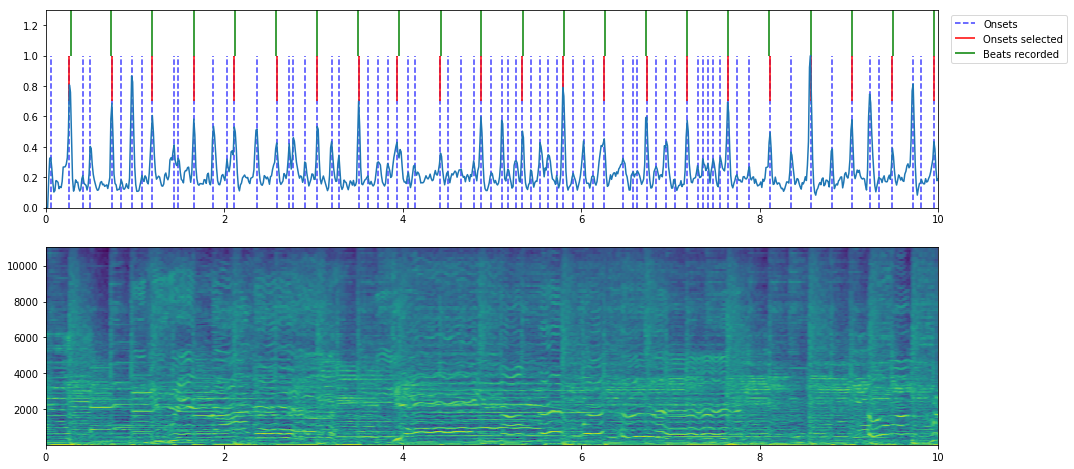

In [23]:
spec, onsets, isbeat = dataset[i]
beats = dataset.get_beats(i)
wav = dataset.get_wav(i)
clicks = librosa.clicks(beats, sr=sr, length=len(wav))
showdata(spec, onsets, isbeat, beats, duration=10, offset=0)
Audio(wav + clicks, rate=sr)

# Test that there is no delay when computing the onsets

In [ ]:
beats = np.arange(0, 5, 0.5, dtype=np.float) + np.random.rand()

In [ ]:
clicks = librosa.clicks(times=beats, sr=sr)

In [ ]:
Audio(clicks, rate=sr)

In [ ]:
librosa.output.write_wav('./tests/test.wav', clicks, sr)

In [ ]:
wav = librosa.load('./tests/test.wav', sr)[0]
plt.figure(figsize=(16, 3))
librosa.display.waveplot(wav, sr)
plt.vlines(beats, -1, 1, color='r', alpha=0.5, linestyles='--')
plt.ylim(-1, 1);
cclicks = librosa.clicks(times=beats, sr=sr, length=len(wav))
Audio(wav + cclicks, rate=sr)

In [ ]:
spec = get_spec('./tests/test.wav')
showspec(spec)

In [ ]:
onsets, isbeat = get_onsets_no_repeat(spec, beats)
showdata(spec, onsets, isbeat, beats)

In [ ]:
onsets_times = librosa.frames_to_time(onsets, sr, hl)

In [ ]:
clickss = librosa.clicks(times=onsets_times, sr=sr, length=len(wav))
Audio(wav + clickss, rate=sr)

In [ ]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(wav + clickss, sr)